NumPy is a Python package that provides:

* a multi-dimensional *array* and whole-array operations
* fast matrix and vector operations
* a library of mathematical functions

To use NumPy in your code, you first need to import it:

In [1]:
import numpy as np

After this `import ... as` statement, you can use all NumPy functions by prefixing them with `np.`

## NumPy arrays

NumPy arrays (also called *ndarray*) are [constructed](https://docs.scipy.org/doc/numpy/user/basics.creation.html) with function `np.array`::

In [8]:
a = np.array([1, 2, 3, 4, 5])

They behave behave a lot like Python lists:

In [5]:
# get items using the [] operator
a[0]

1

In [9]:
# get a slice using [:]
a[0:3]

array([1, 2, 3])

Note that again, a slice of a *ndarray* is again a *ndarray*.

In [10]:
# set an item using [] =
a[4] = 0

In [11]:
print(a)

[1 2 3 4 0]


Note that *ndarray*'s are **homogeneous** -- you cannot mix e.g. neither and strings, but neither integers and floats:

In [12]:
a[4] = 'five'

ValueError: invalid literal for long() with base 10: 'five'

In [17]:
# here, the `5.5` is automatically converted to integer
a[4] = 5.5

In [18]:
a

array([1, 2, 3, 4, 5])

### Setting the type of array items

Arrays are homogeneous (all elements must have the same type) and the [type](https://docs.scipy.org/doc/numpy/user/basics.types.html) is set at array creation time:

In [21]:
a = np.array([1, 2, 3, 4, 5], dtype=np.float64)

a[4] = 5.5

# show a
a

array([ 1. ,  2. ,  3. ,  4. ,  5.5])

## Plotting

[Matplotlib](http://matplotlib.org/gallery.html) is the most-used plotting library in the Python community: it provides a large array of (mostly low level) facilities for making plots, and a more high-level interface largely inspired by MATLAB plotting system.

[Seaborn](http://seaborn.pydata.org/index.html) is an add-on library that provides:

* better default visual styles
* easier plotting functions for many commonly-used types of plots

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn

The `np.arange()` function can be used to generate an *ndarray* containing equally-spaced points from an interval on the real line:

In [23]:
# points in the interval [0,4) spaces 0.1 apart 
x = np.arange(0, 4, 0.1)

In [24]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9])

We can easily create an array with constant value:

In [25]:
y1 = np.ones(len(x))

In [26]:
y1

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

A line plot of y1 over x will just show a flat horizontal line:

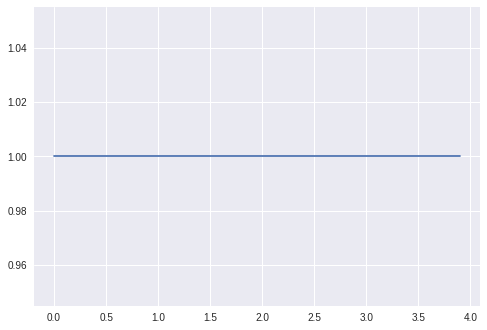

In [28]:
plt.plot(x, y1)

The `np.linspace()` function works just like `np.arange()` but its third parameter is the *number of subdivisions of the interval* (as opposed to the difference of two consecutive points):

In [29]:
y2 = np.linspace(0.5, 3, len(x))

In [50]:
y2

array([ 0.5       ,  0.56410256,  0.62820513,  0.69230769,  0.75641026,
        0.82051282,  0.88461538,  0.94871795,  1.01282051,  1.07692308,
        1.14102564,  1.20512821,  1.26923077,  1.33333333,  1.3974359 ,
        1.46153846,  1.52564103,  1.58974359,  1.65384615,  1.71794872,
        1.78205128,  1.84615385,  1.91025641,  1.97435897,  2.03846154,
        2.1025641 ,  2.16666667,  2.23076923,  2.29487179,  2.35897436,
        2.42307692,  2.48717949,  2.55128205,  2.61538462,  2.67948718,
        2.74358974,  2.80769231,  2.87179487,  2.93589744,  3.        ])

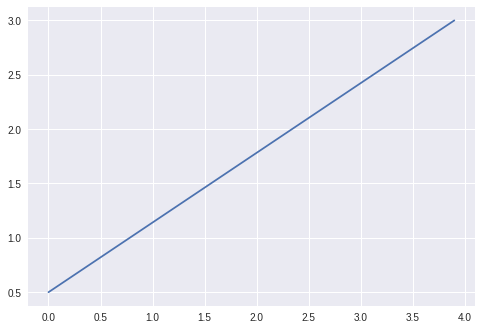

In [31]:
plt.plot(x, y2)

### Exercise 1.

How can you modify the plotting code above to make the line red?  How can you make it thicker?

In [48]:
# hint: look at the docs for `matplotlib.pyplot.plot`

Plotting different series of data in the same figure requires a bit more work:

1. First use the [`plt.subplots`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots) function to create *figure* and an *axes* object
2. An [*axes* object](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes) is a "frame" for a single plot -- use methods [`.plot()`](http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot) to lay a graph onto the canvas.  Each invocation of [`.plot()`](http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot) *adds* a plot onto the canvas. 
3. The [*figure* object](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure) contains all the axes can be used for saving the final output with [`.savefig()`](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.savefig)

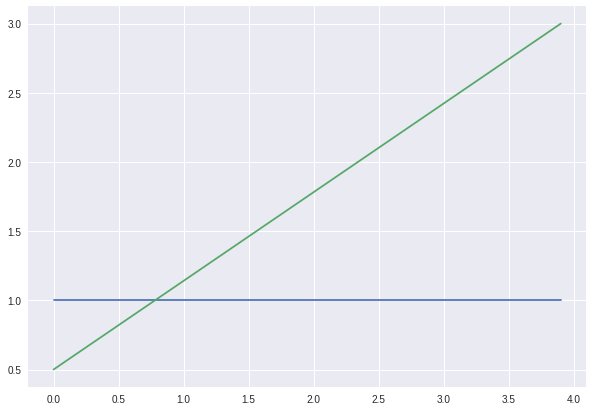

In [43]:
fig, ax = plt.subplots(1, 1, figsize=[10, 7])

ax.plot(x, y1)
ax.plot(x, y2)

## Whole-array operations

NumPy arrays implement operators `+`, `-`, `*`, `/` as *element-wise operations*.

For instance, the array sum `a+b` is the array whose `i`-th element is `a[i]+b[i]`:

In [51]:
a = np.array([1, 2, 3])
b = np.array([0.1, 0.2, 0.3])
c = a + b

In [53]:
c

array([ 1.1,  2.2,  3.3])

Operations involving an array and a scalar value promote the scalar to a constant array having the same *shape*:

In [54]:
y_a = y2 + 1.0
y_b = y2 - 1.0

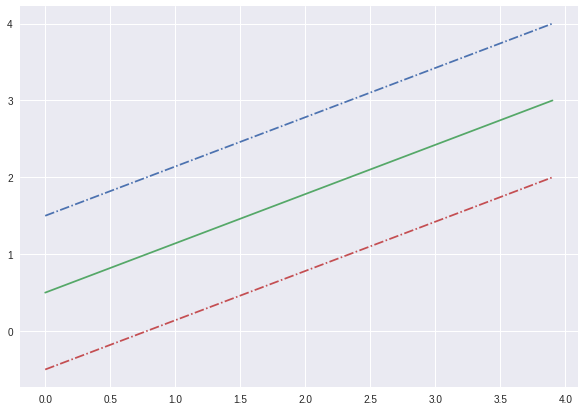

In [57]:
fig, ax = plt.subplots(1, 1, figsize=[10, 7])

ax.plot(x, y_a, linestyle='-.')
ax.plot(x, y2)
ax.plot(x, y_b, linestyle='-.')

### Exercise 2.

Plot the graph of function $f(x) = 1/x$

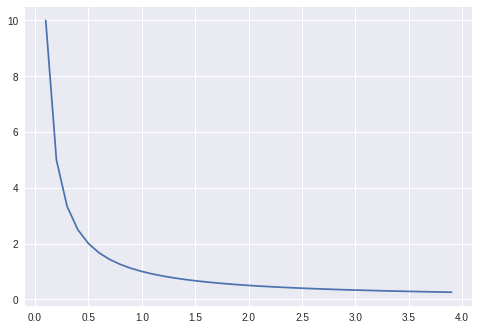

In [59]:
# redefine x to exclude 0
x = np.arange(0.1, 4, 0.1)

# this is interpreted elementwise
y = 1/x

plt.plot(x, y)

## Matrices and higher-dimensional arrays

NumPy allows creation and manipulation of multi-dimensional arrays, the prime example being 2D matrices.

The simplest way to initialize a matrix is to pass `np.array` a list of the matrix rows:

In [70]:
m = np.array([[0, 1], [-1, 0]])

In [67]:
m

array([[1, 2],
       [3, 4]])

The *shape* of a multi-dimensional array is the number of elements along each dimension:

In [61]:
m.shape

(2, 2)

For a 1-dimensional array, the shape is a list comprising a single number:

In [69]:
x.shape

(39,)

Differently from native Python lists, indexing of multi-dimensional arrays is done with the syntax `m[i,j]` instead of `m[i][j]`:

In [63]:
m[1,1] = 7

In [79]:
m

array([[ 0,  1],
       [-1,  0]])

You can take the *transpose* of a matrix by using method `.T` (note: has to be *capital* T):

In [81]:
m.T

array([[ 0, -1],
       [ 1,  0]])

Functions are available to create special matrices (see [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html#numpy.eye) for a complete reference):
    
* [`np.diag(a)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diag.html#numpy.diag) return a square matrix having entries of array `a` along the diagonal. (Note that the length of `a` determines the dimension of the matrix.)
* [`np.eye(N,M)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html#numpy.eye) return the "identity" matrix of dimension $N \times M$       

### Matrix-Vector and Matrix-Matrix multiplication

The [`np.dot`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) is used to compute:

1. the dot (inner) product of two vectors
2. the matrix-vector product
3. matrix-matrix product

In [72]:
a = np.array([0, 1])
b = np.array([1, 0])

The dot product of vectors `a` and `b` is 0:

In [73]:
np.dot(a, b)

0

In [74]:
np.dot(a, a)

1

When `np.dot` is applied to a matrix and a vector, the usual matrix-vector product results:

In [75]:
np.dot(m, a)

array([1, 0])

In [76]:
np.dot(m, b)

array([ 0, -1])

Finally, when `np.dot` is applied to two matrices, the regular matrix-matrix multiplication takes place:

In [77]:
np.dot(m, m)

array([[-1,  0],
       [ 0, -1]])

# Mathematical functions

NumPy provides a [vast choice of mathematical functions](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs) that operate element-wise: among them `np.sin`, `np.cos`, `np.tan`,
`np.log`, `np.log2`, `np.log10`, `np.exp`.

### Exercise 3.

Plot the functions $sin(x)$ and $2 \cdot cos(x) - 1$ on the interval $[-\pi, +\pi]$.

In [85]:
x = np.linspace(-np.pi, +np.pi, 200)

y1 = np.sin(x)

y2 = 2*np.cos(x) - 1

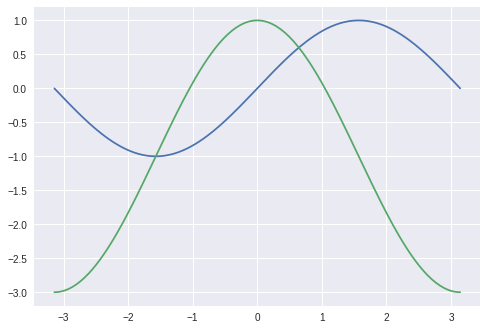

In [86]:
fig, ax = plt.subplots()

ax.plot(x, y1)
ax.plot(x, y2)

## Saving and loading

NumPy provides functions [`array = np.loadtxt(filename, dtype)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html#numpy.loadtxt) and [`np.savetxt(filename, array)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.savetxt.html) that should be used to do *efficient* I/O of large arrays.

SciPy additionally provides functions [`scipy.io.loadmat()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html) and [`scipy.io.loadmat()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.savemat.html) to load/save matrices in MATLAB `.mat` format.

## Further reading

Nicolas Rougier has written excellent tutorials on the use of Matplotlib and NumPy:

* [Matplotlib tutorial](https://www.labri.fr/perso/nrougier/teaching/matplotlib/)
* [NumPy tutorial](http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html)

The Seaborn library comes with a good tutorial written by its author (note that -since Seaborn is an add-on to Matplotlib- some knowledge of Matplotlib is assumed):

* [Seaborn tutorial](http://seaborn.pydata.org/tutorial.html)